In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/laura/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['product', 'datetime', 'colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset

import matplotlib.colors as colors
import matplotlib.cm as cmx
from itertools import product

import time
from datetime import datetime

import scipy.io as sio

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [10]:
directory = '/Users/laura/Documents/scripts/IMEDEA/paperASR/spectra/'

mbox1 = sio.loadmat(directory + 'filter_box1.mat')

# Wavelengths:
wf1_2m_box1 = mbox1['wf1_2m'].squeeze()
wf1_2o_box1 = mbox1['wf1_2o'].squeeze()

# Power spectral density:

Pf_HRm_m_box1     = mbox1['Pf_HRm_m'].squeeze()
Pf_HRm_Mf1_m_box1 = mbox1['Pf_HRm_Mf1_m'].squeeze()
Pf_HRm_Mf2_m_box1 = mbox1['Pf_HRm_Mf2_m'].squeeze()
Pf_HRm_Mf4_m_box1 = mbox1['Pf_HRm_Mf4_m'].squeeze()

Pf_HRo_m_box1     = mbox1['Pf_HRo_m'].squeeze()
Pf_HRo_Mf1_m_box1 = mbox1['Pf_HRo_Mf1_m'].squeeze()
Pf_HRo_Mf2_m_box1 = mbox1['Pf_HRo_Mf2_m'].squeeze()
Pf_HRo_Mf4_m_box1 = mbox1['Pf_HRo_Mf4_m'].squeeze()


# Load selected box
mbox1 = sio.loadmat(directory + 'filter_box1_error_v2.mat')

# Errorbars:

ebm_box1   = mbox1['ebm'].squeeze()
ebmf1_box1 = mbox1['ebmf1'].squeeze()
ebmf2_box1 = mbox1['ebmf2'].squeeze()
ebmf4_box1 = mbox1['ebmf4'].squeeze()

ebo_box1 = mbox1['ebo'].squeeze()
ebof1_box1 = mbox1['ebof1'].squeeze()
ebof2_box1 = mbox1['ebof2'].squeeze()
ebof4_box1 = mbox1['ebof4'].squeeze()

mbox2 = sio.loadmat(directory + 'filter_box2.mat')

# Wavelengths:
wf1_2m_box2 = mbox2['wf1_2m'].squeeze()
wf1_2o_box2 = mbox2['wf1_2o'].squeeze()

# Power spectral density:

Pf_HRm_m_box2     = mbox2['Pf_HRm_m'].squeeze()
Pf_HRm_Mf1_m_box2 = mbox2['Pf_HRm_Mf1_m'].squeeze()
Pf_HRm_Mf2_m_box2 = mbox2['Pf_HRm_Mf2_m'].squeeze()
Pf_HRm_Mf4_m_box2 = mbox2['Pf_HRm_Mf4_m'].squeeze()

Pf_HRo_m_box2     = mbox2['Pf_HRo_m'].squeeze()
Pf_HRo_Mf1_m_box2 = mbox2['Pf_HRo_Mf1_m'].squeeze()
Pf_HRo_Mf2_m_box2 = mbox2['Pf_HRo_Mf2_m'].squeeze()
Pf_HRo_Mf4_m_box2 = mbox2['Pf_HRo_Mf4_m'].squeeze()


# Load selected box
mbox2 = sio.loadmat(directory + 'filter_box2_error_v2.mat')

# Errorbars:

ebm_box2   = mbox2['ebm'].squeeze()
ebmf1_box2 = mbox2['ebmf1'].squeeze()
ebmf2_box2 = mbox2['ebmf2'].squeeze()
ebmf4_box2 = mbox2['ebmf4'].squeeze()

ebo_box2 = mbox2['ebo'].squeeze()
ebof1_box2 = mbox2['ebof1'].squeeze()
ebof2_box2 = mbox2['ebof2'].squeeze()
ebof4_box2 = mbox2['ebof4'].squeeze()


# Pass 15:

In [11]:
plt.rc('legend',**{'fontsize':10})

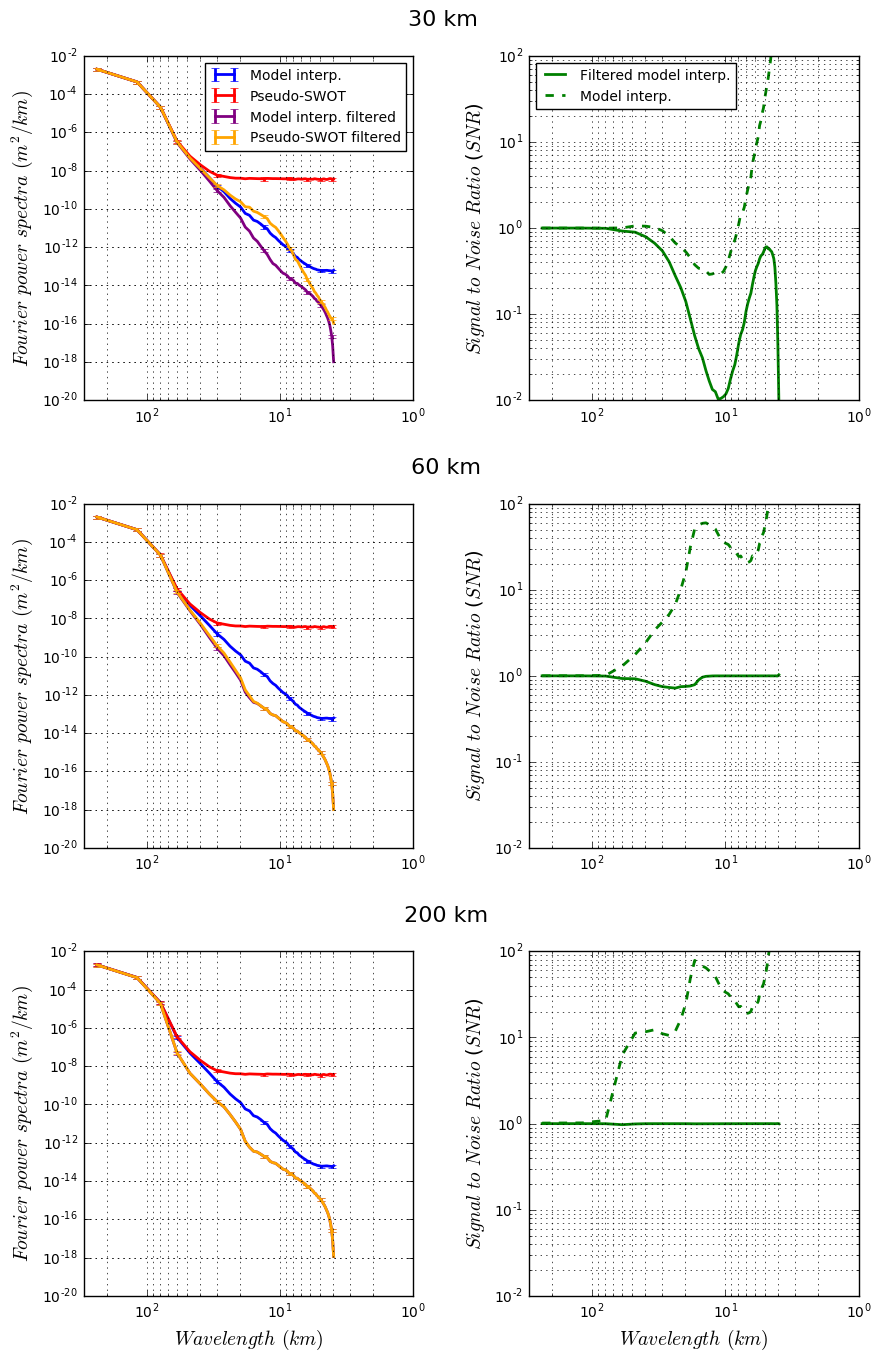

In [12]:
plt.figure(figsize=(10, 16))

gs = gridspec.GridSpec(3, 2)

ax = plt.subplot(gs[0,0])
plt.axis([300., 1., 1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box1, Pf_HRm_m_box1, yerr=ebm_box1.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_m_box1, yerr=ebo_box1.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box1, Pf_HRm_Mf1_m_box1, yerr=ebmf1_box1.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_Mf1_m_box1, yerr=ebof1_box1.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('30 km \n', x=1.1, size='16')
ax.legend(('Model interp.', 'Pseudo-SWOT', 'Model interp. filtered', 'Pseudo-SWOT filtered'), loc='upper right')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')

ax = plt.subplot(gs[1,0])
plt.axis([300., 1., 1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box1, Pf_HRm_m_box1, yerr=ebm_box1.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_m_box1, yerr=ebo_box1.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box1, Pf_HRm_Mf2_m_box1, yerr=ebmf2_box1.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_Mf2_m_box1, yerr=ebof2_box1.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('\n 60 km \n', x=1.1, size='16')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')

ax = plt.subplot(gs[2,0])
plt.axis([300., 1., 1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box1, Pf_HRm_m_box1, yerr=ebm_box1.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_m_box1, yerr=ebo_box1.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box1, Pf_HRm_Mf4_m_box1, yerr=ebmf4_box1.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box1, Pf_HRo_Mf4_m_box1, yerr=ebof4_box1.T, color='orange', linewidth='2') #purple
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('\n 200 km \n', x=1.1, size='16')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')
ax.set_xlabel('$Wavelength$ $(km)$', size='14')

# SNR

ax = plt.subplot(gs[0,1])
plt.axis([300., 1., 10e-3, 100.]) #1.015
plt.loglog(wf1_2o_box1, Pf_HRm_Mf1_m_box1/Pf_HRo_Mf1_m_box1, color='g', linewidth='2')
plt.loglog(wf1_2o_box1, Pf_HRm_m_box1/Pf_HRo_Mf1_m_box1, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.legend(('Filtered model interp.', 'Model interp.'), loc='upper left')

ax = plt.subplot(gs[1,1])
plt.axis([300., 1., 10e-3, 100.]) #1.015
plt.loglog(wf1_2o_box1, Pf_HRm_Mf2_m_box1/Pf_HRo_Mf2_m_box1, color='g', linewidth='2')
plt.loglog(wf1_2o_box1, Pf_HRm_m_box1/Pf_HRo_Mf2_m_box1, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')

ax = plt.subplot(gs[2,1])
plt.axis([300., 1., 10e-3, 100.]) #1.015
plt.loglog(wf1_2o_box1, Pf_HRm_Mf4_m_box1/Pf_HRo_Mf4_m_box1, color='g', linewidth='2')
plt.loglog(wf1_2o_box1, Pf_HRm_m_box1/Pf_HRo_Mf4_m_box1, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_xlabel('$Wavelength$ $(km)$', size='14')

gs.update(hspace=0.3, wspace=0.35) 

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'spectra_p015_v2' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=300)

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/reduced/' + 'spectra_p015_LOWres_v2' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=100)


# Pass 168:

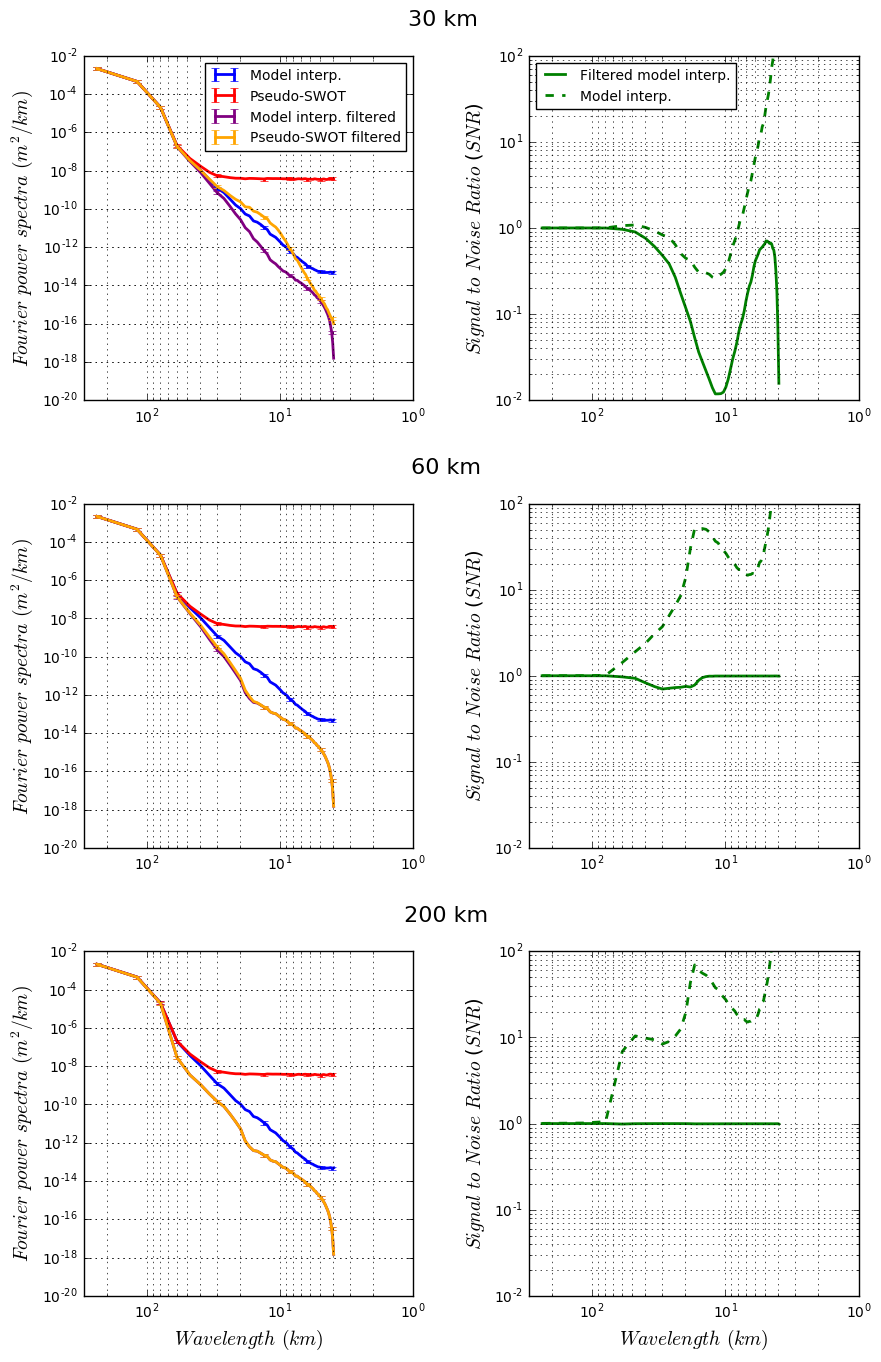

In [8]:
plt.figure(figsize=(10, 16))

gs = gridspec.GridSpec(3, 2)

ax = plt.subplot(gs[0,0])
plt.axis([300., 1., 1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box2, Pf_HRm_m_box2, yerr=ebm_box2.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_m_box2, yerr=ebo_box2.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box2, Pf_HRm_Mf1_m_box2, yerr=ebmf1_box2.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_Mf1_m_box2, yerr=ebof1_box2.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('30 km \n', x=1.1, size='16')
ax.legend(('Model interp.', 'Pseudo-SWOT', 'Model interp. filtered', 'Pseudo-SWOT filtered'), loc='upper right')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')

ax = plt.subplot(gs[1,0])
plt.axis([300., 1., 1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box2, Pf_HRm_m_box2, yerr=ebm_box2.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_m_box2, yerr=ebo_box2.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box2, Pf_HRm_Mf2_m_box2, yerr=ebmf2_box2.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_Mf2_m_box2, yerr=ebof2_box2.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('\n 60 km \n', x=1.1, size='16')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')

ax = plt.subplot(gs[2,0])
plt.axis([300., 1., 1.e-20, 1.e-2])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box2, Pf_HRm_m_box2, yerr=ebm_box2.T, color='b', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_m_box2, yerr=ebo_box2.T, color='r', linewidth='2')
plt.errorbar(wf1_2m_box2, Pf_HRm_Mf4_m_box2, yerr=ebmf4_box2.T, color='purple', linewidth='2')
plt.errorbar(wf1_2o_box2, Pf_HRo_Mf4_m_box2, yerr=ebof4_box2.T, color='orange', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('\n 200 km \n', x=1.1, size='16')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')
ax.set_xlabel('$Wavelength$ $(km)$', size='14')

# SNR

ax = plt.subplot(gs[0,1])
plt.axis([300., 1., 10e-3, 100.])
plt.loglog(wf1_2o_box2, Pf_HRm_Mf1_m_box2/Pf_HRo_Mf1_m_box2, color='g', linewidth='2')
plt.loglog(wf1_2o_box2, Pf_HRm_m_box2/Pf_HRo_Mf1_m_box2, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.legend(('Filtered model interp.', 'Model interp.'), loc='upper left')

ax = plt.subplot(gs[1,1])
plt.axis([300., 1., 10e-3, 100.])
plt.loglog(wf1_2o_box2, Pf_HRm_Mf2_m_box2/Pf_HRo_Mf2_m_box2, color='g', linewidth='2')
plt.loglog(wf1_2o_box2, Pf_HRm_m_box2/Pf_HRo_Mf2_m_box2, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')

ax = plt.subplot(gs[2,1])
plt.axis([300., 1., 10e-3, 100.])
plt.loglog(wf1_2o_box2, Pf_HRm_Mf4_m_box2/Pf_HRo_Mf4_m_box2, color='g', linewidth='2')
plt.loglog(wf1_2o_box2, Pf_HRm_m_box2/Pf_HRo_Mf4_m_box2, 'g--', linewidth='2')
ax.set_ylabel('$Signal$ $to$ $Noise$ $Ratio$ ($SNR$)', size='14')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_xlabel('$Wavelength$ $(km)$', size='14')

gs.update(hspace=0.3, wspace=0.35)

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'spectra_p168_v2' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=300)

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/reduced/' + 'spectra_p168_LOWres_v2' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=100)
    
